In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = pd.read_csv('Admission_Predict.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df = df.drop(['Serial No.'], axis=1)
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [5]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [6]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [7]:
print(df.dtypes)

GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object


In [8]:
df.shape

(400, 8)

In [9]:
df.corr(method='pearson')

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


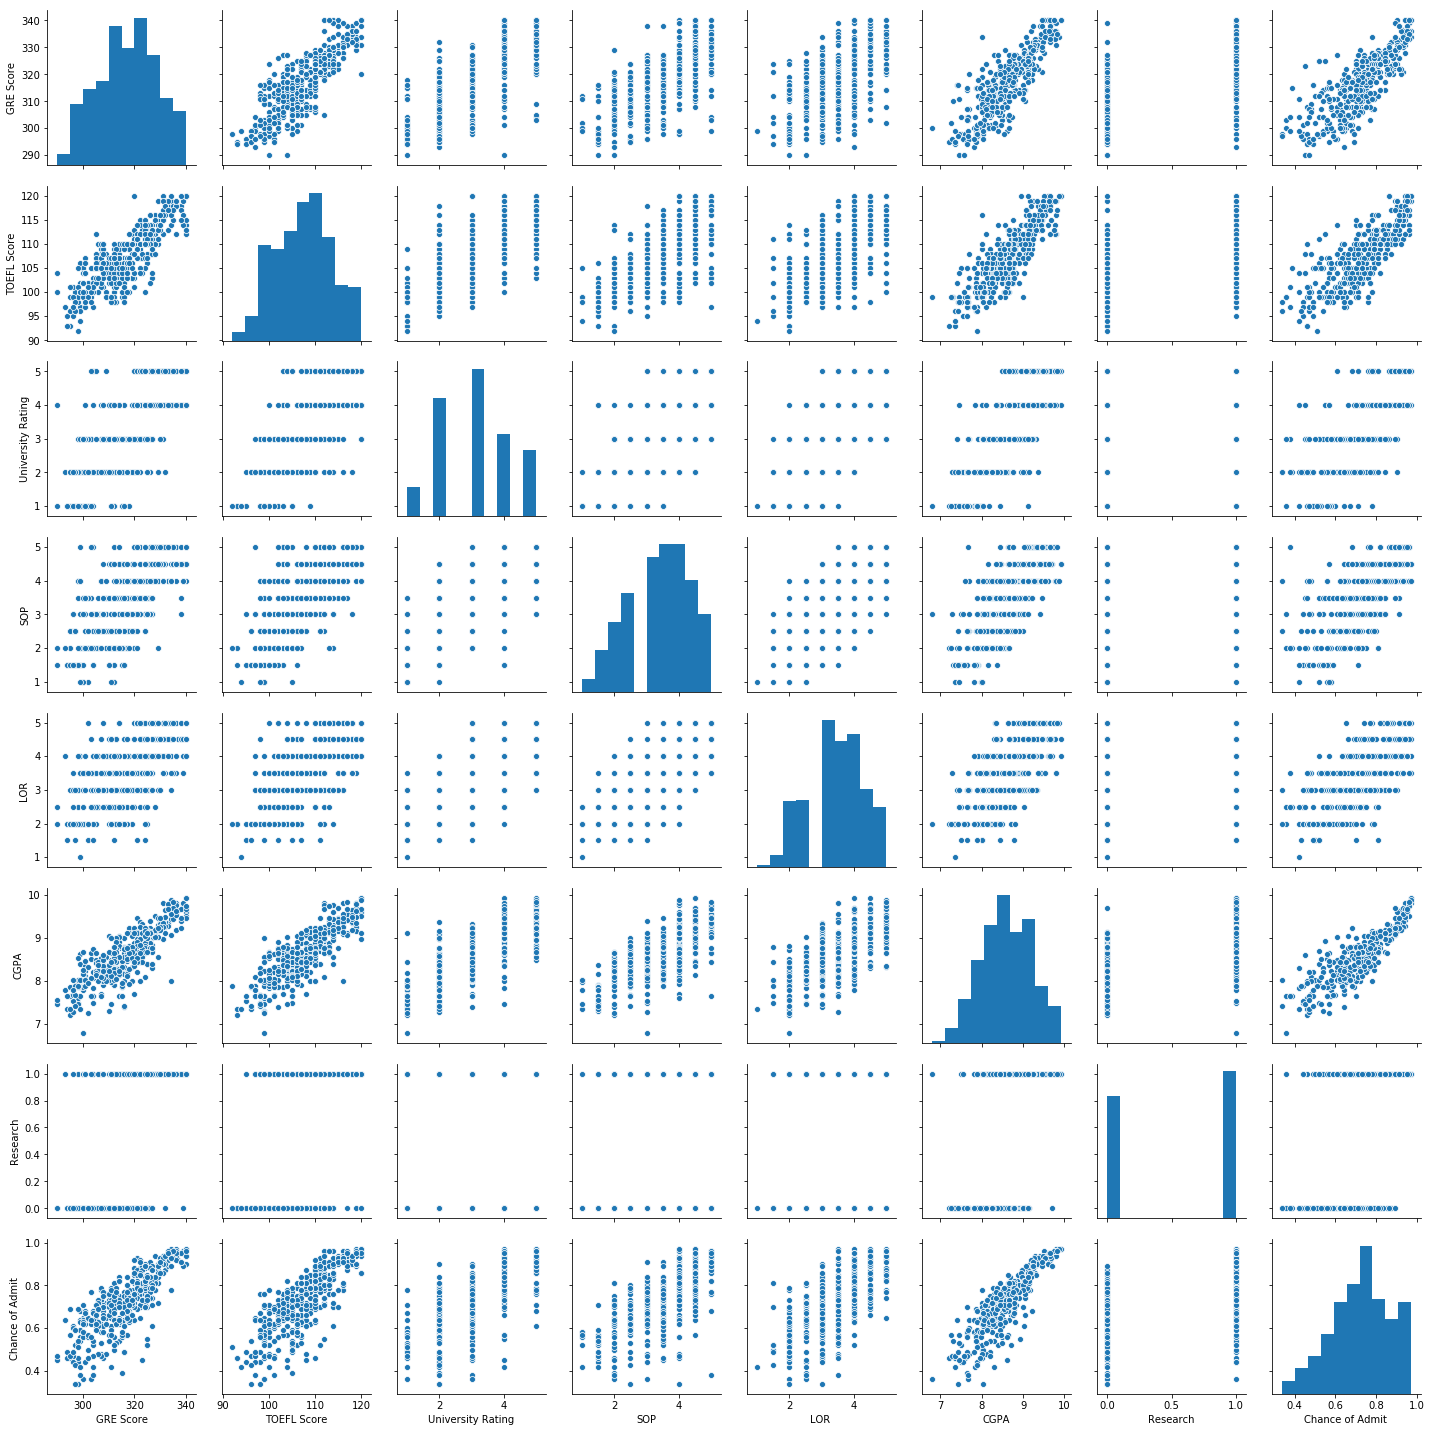

In [10]:
import seaborn as sn
# Create the default pairplot
sn.pairplot(df)

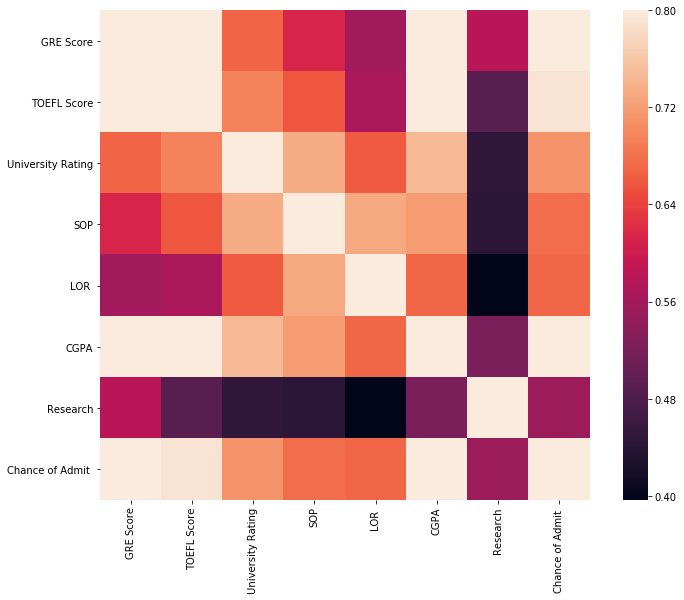

In [11]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12,9))
sn.heatmap(corrmat, vmax=.8, square=True);

In [12]:
X = df.iloc[:, 0:7].values
y = df.iloc[:, 7].values

In [13]:
print(X)

[[337.   118.     4.   ...   4.5    9.65   1.  ]
 [324.   107.     4.   ...   4.5    8.87   1.  ]
 [316.   104.     3.   ...   3.5    8.     1.  ]
 ...
 [330.   116.     4.   ...   4.5    9.45   1.  ]
 [312.   103.     3.   ...   4.     8.78   0.  ]
 [333.   117.     4.   ...   4.     9.66   1.  ]]


In [14]:
print(y)

[0.92 0.76 0.72 0.8  0.65 0.9  0.75 0.68 0.5  0.45 0.52 0.84 0.78 0.62
 0.61 0.54 0.66 0.65 0.63 0.62 0.64 0.7  0.94 0.95 0.97 0.94 0.76 0.44
 0.46 0.54 0.65 0.74 0.91 0.9  0.94 0.88 0.64 0.58 0.52 0.48 0.46 0.49
 0.53 0.87 0.91 0.88 0.86 0.89 0.82 0.78 0.76 0.56 0.78 0.72 0.7  0.64
 0.64 0.46 0.36 0.42 0.48 0.47 0.54 0.56 0.52 0.55 0.61 0.57 0.68 0.78
 0.94 0.96 0.93 0.84 0.74 0.72 0.74 0.64 0.44 0.46 0.5  0.96 0.92 0.92
 0.94 0.76 0.72 0.66 0.64 0.74 0.64 0.38 0.34 0.44 0.36 0.42 0.48 0.86
 0.9  0.79 0.71 0.64 0.62 0.57 0.74 0.69 0.87 0.91 0.93 0.68 0.61 0.69
 0.62 0.72 0.59 0.66 0.56 0.45 0.47 0.71 0.94 0.94 0.57 0.61 0.57 0.64
 0.85 0.78 0.84 0.92 0.96 0.77 0.71 0.79 0.89 0.82 0.76 0.71 0.8  0.78
 0.84 0.9  0.92 0.97 0.8  0.81 0.75 0.83 0.96 0.79 0.93 0.94 0.86 0.79
 0.8  0.77 0.7  0.65 0.61 0.52 0.57 0.53 0.67 0.68 0.81 0.78 0.65 0.64
 0.64 0.65 0.68 0.89 0.86 0.89 0.87 0.85 0.9  0.82 0.72 0.73 0.71 0.71
 0.68 0.75 0.72 0.89 0.84 0.93 0.93 0.88 0.9  0.87 0.86 0.94 0.77 0.78
 0.73 

# Splitting the dataset into the Training set and Test set

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# L'algorithme Adaboost

AdaBoost (ou adaptive boosting) est en apprentissage automatique (maching learning), un méta-algorithme de boosting de l’ensemble learning introduit par Yoav Freund et Robert Schapire . AdaBoost est adaptatif dans le sens où les classeurs faibles subséquents sont ajustés en faveur des échantillons mal classés par les classeurs précédents. AdaBoost est notablement sensible aux données bruitées ou peu corrélées. AdaBoost (avec des arbres de décision comme classeurs faibles) est souvent désigné comme le meilleur classeur clé-en-main.image.pngDonc nous avons appliquer notre algorithme sur les données d’apprentissage.
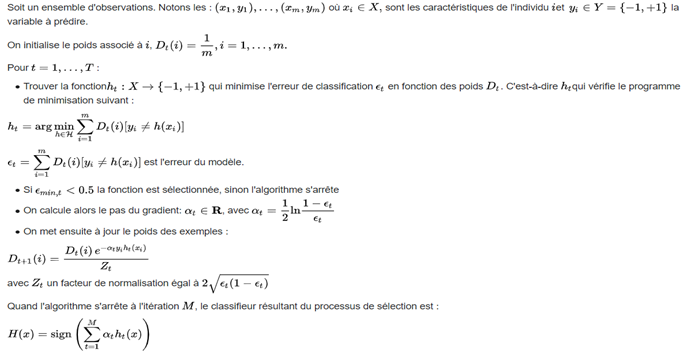
Donc  je vais appliquer mon algorithme sur les données d’apprentissage.

In [16]:
from sklearn.ensemble import AdaBoostRegressor
modelAdaboost = AdaBoostRegressor()
modelAdaboost.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None)

Puis nous faisons la prédiction des données test

In [19]:
y_predAdaboost = modelAdaboost.predict(X_test)

Ensuite j’affiche la précision de l’algorithme adboost qui a pour valeur 75.03% et l'écart-type qui prend la valeur 6.63% avec une technique appelée K-Fold Cross Validation (validation croisée du pli K) qui améliore beaucoup les choses. Parce que, cela résoudra ce problème de variance. Et comment ça va s'arranger ? Il le fixera en divisant le jeu d'apprentissage en 10 plis lorsque K est égal à 10, et la plupart du temps, K est égal à 10. Et nous entraînons notre modèle sur 9 plis et nous le testons sur le dernier pli restant. Et comme avec 10 plis nous pouvons faire 10 combinaisons différentes de 9 plis pour former un modèle et 1 plis pour le tester. Cela signifie que nous pouvons former le modèle et le tester sur dix combinaisons d'ensembles de formation et de tests. Et cela nous donnera déjà un meilleure idée de la performance du modèle car, ce que nous pouvons faire ensuite, c'est prendre une moyenne des différentes précisions des dix évaluations et calculer également l'écart-type pour examiner la variance.

In [30]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = modelAdaboost, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 75.93 %
Standard Deviation: 6.29 %


Puis le moyen absolu de l’erreur qui est une mesure des erreurs entre des avis appariées exprimant le même phénomène qui a 0.06% et le moyen des erreurs qui a 0.006% et le root mean squared error qui est une mesure fréquemment utilisée des différences entre les valeurs d’échantillon prédites par un modèle et les valeurs observées et prend la valeur 0.08%.

In [31]:
from sklearn import metrics 
%matplotlib inline
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predAdaboost)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predAdaboost))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test, y_predAdaboost)))

Mean Absolute Error: 0.06400513691733406
Mean Squared Error: 0.0064253283585612555
Root Mean Squared Error: 0.08015814592766761


Enfin nous avons faire une comparaison entre les valeurs prédites et les valeurs observées. 

In [23]:
print(np.concatenate((y_predAdaboost.reshape(len(y_predAdaboost),1), y_test.reshape(len(y_test),1)),1))

[[0.6612     0.71      ]
 [0.63058824 0.7       ]
 [0.766      0.79      ]
 [0.66676923 0.73      ]
 [0.68533333 0.72      ]
 [0.62567568 0.48      ]
 [0.66463158 0.77      ]
 [0.64       0.71      ]
 [0.885      0.9       ]
 [0.88444444 0.94      ]
 [0.54603448 0.58      ]
 [0.869      0.89      ]
 [0.66535714 0.72      ]
 [0.46948718 0.57      ]
 [0.82966102 0.78      ]
 [0.66676923 0.42      ]
 [0.61671429 0.64      ]
 [0.8075     0.84      ]
 [0.58881579 0.63      ]
 [0.69858974 0.72      ]
 [0.84490566 0.9       ]
 [0.80148936 0.83      ]
 [0.64264706 0.57      ]
 [0.49727273 0.47      ]
 [0.78933333 0.85      ]
 [0.58881579 0.67      ]
 [0.46948718 0.44      ]
 [0.67253623 0.54      ]
 [0.84972222 0.92      ]
 [0.66676923 0.62      ]
 [0.62361111 0.68      ]
 [0.65788991 0.73      ]
 [0.71008    0.73      ]
 [0.55323232 0.61      ]
 [0.7283871  0.55      ]
 [0.71548077 0.74      ]
 [0.63223464 0.64      ]
 [0.84888889 0.89      ]
 [0.66676923 0.73      ]
 [0.88666667 0.95      ]


# L'algoithme XGBoost

XGBoost (comme eXtreme Gradient Boosting) est une implémentation open source optimisée de l’algorithme d’arbres de boosting de gradient, c’est à dire combiner les résultats d’un ensemble de modèles plus simple et plus faibles afin de fournir une meilleur prédiction.
Maintenant que nous avons présenté le modèle, passons à la formation: comment devons-nous apprendre les arbres? La réponse est, comme toujours pour tous les modèles d'apprentissage supervisé: définir une fonction objective et l'optimiser!
Soit la fonction objective suivante :
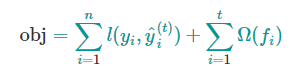

Nous écrivons la valeur de prédiction à l'étape t comme :
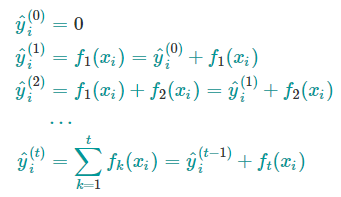

Il faut donc d'ajouter l’arbre qui optimise notre objectif :
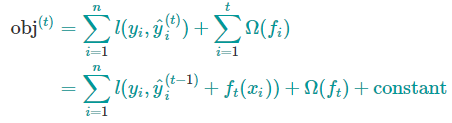

Si nous considérons l'utilisation de l'erreur quadratique moyenne comme fonction de perte, l'objectif devient :
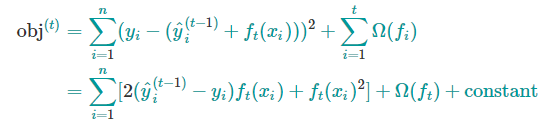

La forme de l'erreur quadratique moyenne est conviviale, avec un terme de premier ordre (généralement appelé résidu) et un terme quadratique. Pour d'autres pertes d'intérêt (par exemple, perte logistique), il n'est pas facile d'obtenir une belle forme. Donc, dans le cas général, nous prenons l'expansion de Taylor de la fonction de perte jusqu'au second ordre:
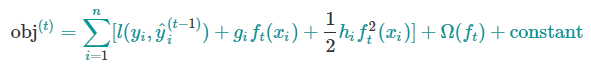

Où gi et hi sont définis comme :
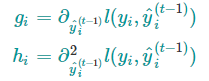

Après avoir supprimé toutes les constantes, la fonction objective à l'étape t devient :
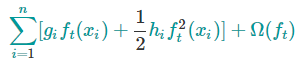

Cela devient notre objectif d'optimisation pour le nouvel arbre. Un avantage important de cette définition est que la valeur de la fonction objectif ne dépend que de gi et hi. C'est ainsi que XGBoost prend en charge les fonctions de perte personnalisées. Nous pouvons optimiser chaque fonction de perte, y compris la régression logistique et le classement par paires, en utilisant exactement le même solveur qui prend gi et hi en entrée.
IL y a une chose importante, le terme de régularisation! Nous devons définir la complexité de l'arbre Ω (f). Pour ce faire, donc la définition de l'arbre f (x) est :
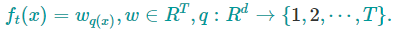

Ici, w est le vecteur des scores, q est une fonction affectant chaque point de données à la feuille correspondante et T est le nombre de feuilles. Dans XGBoost, nous définissons la complexité comme :
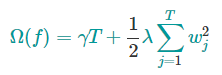

Bien sûr, il y a plus une autre façon de définir la complexité, mais celle-ci fonctionne bien dans la pratique. La régularisation est une partie que la plupart des paquets d'arbres traitent moins soigneusement, ou simplement les ignorent. 
Après avoir reformulé le modèle d'arbre, nous pouvons écrire la valeur de l'objectif avec le t-ième arbre comme:
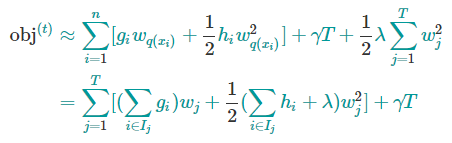

où Ij = {i | q (xi) = j} est l'ensemble des indices de points de données affectés à la j-ème feuille.
On peut remplacer Gj par : 
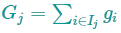

Et Hi par :
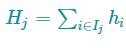

Donc Obj devient :
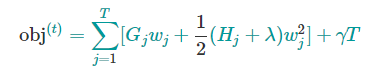

Dans cette équation, wj sont indépendants les uns des autres, la forme
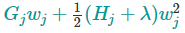
est quadratique. Et le meilleur wj pour une structure donnée q (x) et la meilleure réduction objective que nous pouvons obtenir est:

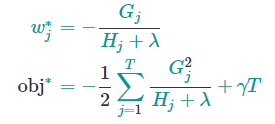
Maintenant que nous avons un moyen de mesurer la qualité d'un arbre, nous énumérerions tous les arbres possibles et choisirions le meilleur. En pratique, cela est insoluble, nous allons donc essayer d'optimiser un niveau de l'arbre à la fois. Plus précisément, nous essayons de diviser une feuille en deux feuilles, et le score qu'elle gagne est :

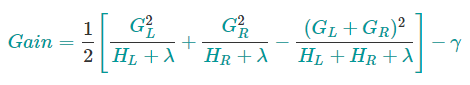
XGBoost est exactement un outil motivé par le principe formel ici, il est développé en tenant compte à la fois de l'optimisation des systèmes et des principes de l'apprentissage automatique. Le but de cette librairie est de pousser l'extrême des limites de calcul des machines pour fournir une librairie évolutive, portable et précise.

In [32]:
from xgboost import XGBRegressor
modelXgboost = XGBRegressor()
modelXgboost.fit(X_train, y_train)

[20:46:04] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

 la prédiction des données test est :

In [33]:
y_predXgboost = modelXgboost.predict(X_test)

La précision de l’algorithme XGBoosta pour valeur de 76.87% et l'écart-type qui prend la valeur 6.63% avec la technique K-Fold Cross Validation.

In [26]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = modelXgboost, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

[20:29:37] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:29:37] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:29:37] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:29:37] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:29:37] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:29:37] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:29:37] WARNI

le moyen absolu de l’erreur a 0.064%, le moyen des erreurs qui a 0.006% et le root mean squared error a 0.080%.

In [34]:
from sklearn import metrics 
%matplotlib inline
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predXgboost)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predXgboost))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test, y_predXgboost)))

Mean Absolute Error: 0.05518582467734814
Mean Squared Error: 0.006082945979791775
Root Mean Squared Error: 0.0779932431675448


Finalement nous avons faire une comparaison entre les valeurs prédites et les valeurs observées. 

In [35]:
print(np.concatenate((y_predXgboost.reshape(len(y_predXgboost),1), y_test.reshape(len(y_test),1)),1))

[[0.69932848 0.71      ]
 [0.64631557 0.7       ]
 [0.76684904 0.79      ]
 [0.66077203 0.73      ]
 [0.71400535 0.72      ]
 [0.650805   0.48      ]
 [0.71152008 0.77      ]
 [0.67741632 0.71      ]
 [0.89259529 0.9       ]
 [0.92941201 0.94      ]
 [0.53923905 0.58      ]
 [0.91834605 0.89      ]
 [0.68273669 0.72      ]
 [0.44610891 0.57      ]
 [0.84690952 0.78      ]
 [0.69033527 0.42      ]
 [0.67796367 0.64      ]
 [0.78900838 0.84      ]
 [0.58632135 0.63      ]
 [0.7358914  0.72      ]
 [0.84791505 0.9       ]
 [0.81606328 0.83      ]
 [0.64748055 0.57      ]
 [0.45005751 0.47      ]
 [0.81466389 0.85      ]
 [0.60125536 0.67      ]
 [0.44300529 0.44      ]
 [0.69289649 0.54      ]
 [0.88437599 0.92      ]
 [0.67669553 0.62      ]
 [0.63156599 0.68      ]
 [0.73590928 0.73      ]
 [0.7550323  0.73      ]
 [0.56410712 0.61      ]
 [0.73602492 0.55      ]
 [0.75173044 0.74      ]
 [0.62383199 0.64      ]
 [0.89788568 0.89      ]
 [0.6389786  0.73      ]
 [0.93596816 0.95      ]
